# TP 2. PARTIE 1. scikit-learn + Naive Bayes

Le module de Machine Learning en Python : scitkit-learn (sklearn)
http://scikit-learn.org/stable/

## Plan :

   [- Iris dataset](#1)
   
   [- Naive Bayes](#2)
   
   [- Mon Naive Bayes](#3)
   
   [- Tests](#4)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

# 1. Iris dataset


On va chercher le dataset **iris** dans le module sklearn

In [27]:
from sklearn import datasets
iris = datasets.load_iris()

1) Analyser les résultats des commandes suivantes:

In [28]:
type(iris)

sklearn.utils.Bunch

In [33]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
type(iris.data)

numpy.ndarray

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
type(iris.target)

numpy.ndarray

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 2. Naive Bayes


In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(BaseNB)
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via `partial_fit` method.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like, shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, optional (default=1e-9)
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |  Attributes
 |  ----------
 |  class_prior_ : array, shape (n_classes,)
 |      probability of each class.
 |  
 |  

In [12]:
gnb = GaussianNB()
help(gnb.fit)

Help on method fit in module sklearn.naive_bayes:

fit(X, y, sample_weight=None) method of sklearn.naive_bayes.GaussianNB instance
    Fit Gaussian Naive Bayes according to X, y
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples
        and n_features is the number of features.
    
    y : array-like, shape (n_samples,)
        Target values.
    
    sample_weight : array-like, shape (n_samples,), optional (default=None)
        Weights applied to individual samples (1. for unweighted).
    
        .. versionadded:: 0.17
           Gaussian Naive Bayes supports fitting with *sample_weight*.
    
    Returns
    -------
    self : object



On donne ici un exemple d'utilisation du Naive Bayes:

In [13]:
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
       % (iris.data.shape[0],(iris.target != y_pred).sum()))


Number of mislabeled points out of a total 150 points : 6


In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
gnb.fit(iris.data, iris.target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

2) On sépare en 2 parties égales le dataset avec tirage aléatoire sans remise

In [18]:
train = np.random.choice(range(150), 75, replace=False)
train

array([109, 121,  96,  14, 108, 136,  82,  37, 146,  54,  99,  44, 133,
        46,   0, 110, 141,  25,  88, 124, 138, 131,  22,  31,  69,   1,
        20,  77,  33,  42,  59,  86, 115,  97,  65,  13, 112,  80,  28,
        68,  94, 142,  67,  29,  98,  73, 125,  39,  79, 148,  63,  36,
        11, 113,  16,  17,  76,  90, 132,  85,  32,  60,  51,  91,  27,
        84,  40, 118,  47, 130,   9,  41,   2,   6, 144])

In [19]:
test = np.delete(range(150), train)
test

array([  3,   4,   5,   7,   8,  10,  12,  15,  18,  19,  21,  23,  24,
        26,  30,  34,  35,  38,  43,  45,  48,  49,  50,  52,  53,  55,
        56,  57,  58,  61,  62,  64,  66,  70,  71,  72,  74,  75,  78,
        81,  83,  87,  89,  92,  93,  95, 100, 101, 102, 103, 104, 105,
       106, 107, 111, 114, 116, 117, 119, 120, 122, 123, 126, 127, 128,
       129, 134, 135, 137, 139, 140, 143, 145, 147, 149])

Puis on regarde le résutat sur la prédiction

In [20]:
y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
100*(iris.target[test,] != y_pred).sum()/len(test)


5.333333333333333

3) Construire une fonction NB de paramètre A, B et nb qui répète nb tirages aléatoires avec i données pour la partie apprentissage et 150-i pour le test avec i allant de A à B. La fonction renvoie une liste de taille B-A+1 avec le pourcentage de prédiction exacte sur les données de test.

In [21]:
np.random.choice(range(150), 5, replace=False)

array([ 86,  99,  52,  65, 143])

In [22]:
def NB(A,B,nb):
    res = []
    for i in range(A,B+1):
        temp = 0
        for j in range(nb):
            train = np.random.choice(range(150), i, replace=False)
            test = np.delete(range(150), train)
            y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
            temp = temp + 100*(iris.target[test,] != y_pred).sum()/len(test)
        res = res + [temp/nb]
    return res
NB(2,30,3)


[48.648648648648646,
 47.61904761904763,
 54.337899543378995,
 46.20689655172415,
 51.15740740740741,
 45.68764568764569,
 41.07981220657277,
 33.333333333333336,
 22.14285714285714,
 23.02158273381295,
 6.763285024154588,
 35.523114355231144,
 9.068627450980392,
 27.160493827160494,
 8.457711442786069,
 17.79448621553885,
 5.808080808080809,
 4.8346055979643765,
 8.461538461538462,
 13.953488372093025,
 9.635416666666666,
 9.186351706036746,
 6.613756613756614,
 6.933333333333333,
 5.645161290322581,
 5.420054200542005,
 7.923497267759562,
 6.06060606060606,
 7.500000000000001]

4) Tracer sur un graphique le vecteur NB(A,B,10) avec A = 2 et B = 149

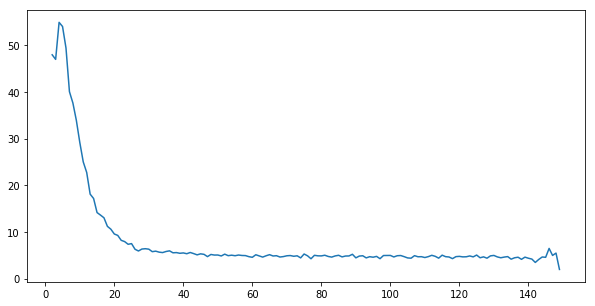

In [23]:
A = 2
B = 149
plt.figure(figsize=(10,5))
plt.plot(np.linspace(A,B,B-A+1), NB(A,B,100));

# 3. Mon Naive Bayes

5) Si Bayes est si naif que ça, pourquoi pas le construire nous-même ! En s'aidant du cours, construire la fonction MonNaiveBayes sur le modèle suivant

In [24]:
def MonNaiveBayes(train, test):
    
    return res

6) Comparer le résultat au résultat de la fonction de sklearn

In [25]:
import copy
iris2 = copy.deepcopy(iris)

iris2.data = iris2.data[3:30,]
iris2.target = iris2.target[3:30,]
MonNaiveBayes(iris, iris2)

NameError: name 'res' is not defined

# 3. Tests